In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

Cloning into 'Monk_Object_Detection'...
remote: Enumerating objects: 10550, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 10550 (delta 10), reused 0 (delta 0), pack-reused 10528
Receiving objects: 100% (10550/10550), 260.87 MiB | 38.32 MiB/s, done.
Resolving deltas: 100% (4704/4704), done.
Checking out files: 100% (8428/8428), done.


In [ ]:
! cd Monk_Object_Detection/1_gluoncv_finetune/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install

     |████████████████████████████████| 352.6MB 35kB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 1.3MB 26.2MB/s 


In [ ]:
! unzip -qq "/content/drive/MyDrive/Project A/zip/helmet_dataset.zip"

In [ ]:
!nvidia-smi

Fri May 21 11:19:54 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/1_gluoncv_finetune/lib/");

In [ ]:
from detector_prototype import Detector

In [ ]:
gtf = Detector();

In [ ]:
root = "helmet_dataset/";                         
img_dir = "JPEGImages/";                                                     
anno_file = "train_labels.csv";
batch_size=4;

In [ ]:
gtf.Dataset(root, img_dir, anno_file, batch_size=batch_size);

100%|██████████| 3174/3174 [00:31<00:00, 100.01it/s]


In [ ]:
pretrained = True;         
gpu=True;
model_name = "ssd_512_resnet50_v1_coco";

In [ ]:
gtf.Model(model_name, use_pretrained=pretrained, use_gpu=gpu);

/usr/local/lib/python3.7/dist-packages/mxnet/gluon/block.py:1591: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


181189KB [00:03, 52576.85KB/s]                            


In [ ]:
gtf.Set_Learning_Rate(0.001);

In [ ]:
epochs=5;
params_file = "saved_model.params";

In [ ]:
gtf.Train(epochs, params_file);

[Epoch 0][Batch 0], Speed: 0.670 samples/sec, CrossEntropy=10.880, SmoothL1=4.266
[Epoch 0][Batch 20], Speed: 5.095 samples/sec, CrossEntropy=8.373, SmoothL1=3.165
[Epoch 0][Batch 40], Speed: 3.102 samples/sec, CrossEntropy=7.009, SmoothL1=2.535
[Epoch 0][Batch 60], Speed: 9.591 samples/sec, CrossEntropy=6.216, SmoothL1=2.232
[Epoch 0][Batch 80], Speed: 10.315 samples/sec, CrossEntropy=5.740, SmoothL1=2.271
[Epoch 0][Batch 100], Speed: 5.541 samples/sec, CrossEntropy=5.404, SmoothL1=2.249
[Epoch 0][Batch 120], Speed: 5.411 samples/sec, CrossEntropy=5.166, SmoothL1=2.088
[Epoch 0][Batch 140], Speed: 8.699 samples/sec, CrossEntropy=4.989, SmoothL1=1.998
[Epoch 0][Batch 160], Speed: 10.723 samples/sec, CrossEntropy=4.857, SmoothL1=1.976
[Epoch 0][Batch 180], Speed: 9.901 samples/sec, CrossEntropy=4.740, SmoothL1=1.913
[Epoch 0][Batch 200], Speed: 8.339 samples/sec, CrossEntropy=4.641, SmoothL1=1.944
[Epoch 0][Batch 220], Speed: 9.929 samples/sec, CrossEntropy=4.546, SmoothL1=1.886
[Epoch 

In [ ]:
import os
import sys
sys.path.append("Monk_Object_Detection/1_gluoncv_finetune/lib/");

In [ ]:
from inference_prototype import Infer

In [ ]:
model_name = "ssd_512_resnet50_v1_coco";
params_file = "saved_model.params";
class_list = ["Detected", "Detected", "None", "Detected", "Detected"];

In [ ]:
ifr = Infer(model_name, params_file, class_list, use_gpu=True,verbose=1);

/usr/local/lib/python3.7/dist-packages/mxnet/gluon/block.py:1591: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


In [ ]:
img_name = "Monk_Object_Detection/example_notebooks/sample_dataset/helmet_test/img1.jpg"; 
visualize = True;
thresh = 0.9;

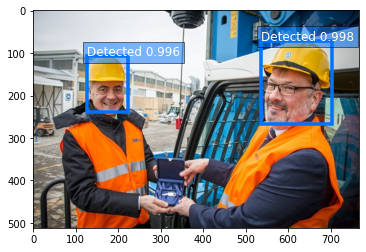

<Figure size 432x288 with 0 Axes>

In [ ]:
img_name = "Monk_Object_Detection/example_notebooks/sample_dataset/helmet_test/img2.jpg"; 
visualize = True;
thresh = 0.9;
output = ifr.run(img_name, visualize=visualize, thresh=thresh);

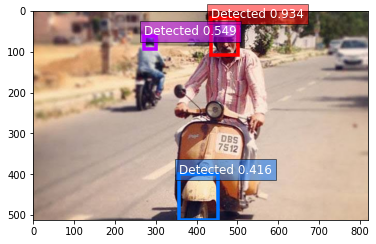

<Figure size 432x288 with 0 Axes>

In [ ]:
img_name = "Monk_Object_Detection/example_notebooks/sample_dataset/helmet_test/img5.jpeg"; 
visualize = True;
thresh = 0.4;
output = ifr.run(img_name, visualize=visualize, thresh=thresh);

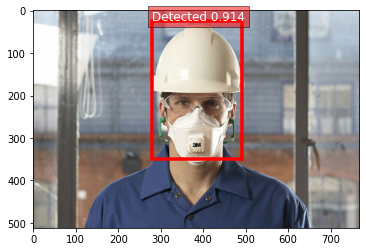

<Figure size 432x288 with 0 Axes>

In [ ]:
img_name = "drive/MyDrive/Project A/TestImg/1.jpg"; 
visualize = True;
thresh = 0.8;
output = ifr.run(img_name, visualize=visualize, thresh=thresh);

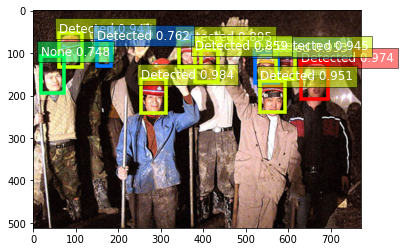

<Figure size 432x288 with 0 Axes>

In [ ]:
img_name = "drive/MyDrive/Project A/TestImg/2.jpg"; 
visualize = True;
thresh = 0.6;
output = ifr.run(img_name, visualize=visualize, thresh=thresh);

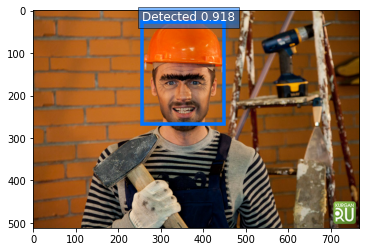

<Figure size 432x288 with 0 Axes>

In [ ]:
img_name = "drive/MyDrive/Project A/TestImg/3.png"; 
visualize = True;
thresh = 0.8;
output = ifr.run(img_name, visualize=visualize, thresh=thresh);

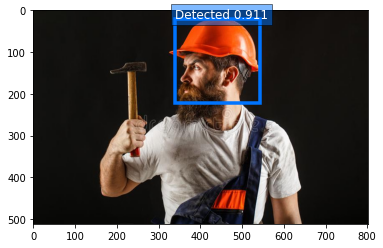

<Figure size 432x288 with 0 Axes>

In [ ]:
img_name = "drive/MyDrive/Project A/TestImg/4.jpg"; 
visualize = True;
thresh = 0.4;
output = ifr.run(img_name, visualize=visualize, thresh=thresh);

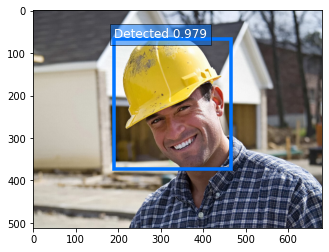

<Figure size 432x288 with 0 Axes>

In [ ]:
img_name = "drive/MyDrive/Project A/TestImg/5.jpg"; 
visualize = True;
thresh = 0.6;
output = ifr.run(img_name, visualize=visualize, thresh=thresh);

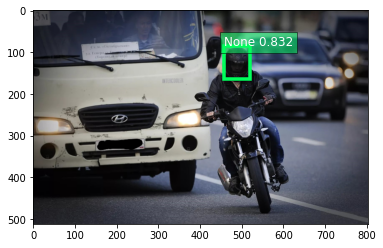

<Figure size 432x288 with 0 Axes>

In [ ]:
img_name = "drive/MyDrive/Project A/TestImg/6.jpg"; 
visualize = True;
thresh = 0.5;
output = ifr.run(img_name, visualize=visualize, thresh=thresh);

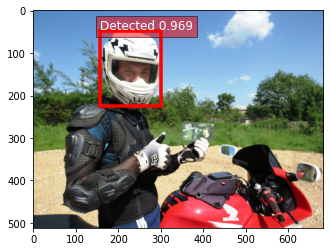

<Figure size 432x288 with 0 Axes>

In [ ]:
img_name = "drive/MyDrive/Project A/TestImg/7.jpg"; 
visualize = True;
thresh = 0.5;
output = ifr.run(img_name, visualize=visualize, thresh=thresh);